In [1]:
#Extra Question 1
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [2]:
# Set the number of threads to be 1 for K Means to proceed without warnings
import os
os.environ['OMP_NUM_THREADS'] = '2'

In [3]:
# Generate a simple dataset
np.random.seed(42)
X = np.random.randn(100, 2)


In [4]:
# Introduce some outliers
outliers = np.array([[8, 8], [9, 9], [10, 10]])
X_with_outliers = np.vstack([X, outliers])


In [5]:
#Question:1
# Now do clustering on two clusters and visualize aganist the 2 features

# ANSWER
# 2 clusters

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_with_outliers)

C:\Users\mdjro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

In [6]:
labels = kmeans.labels_
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1]


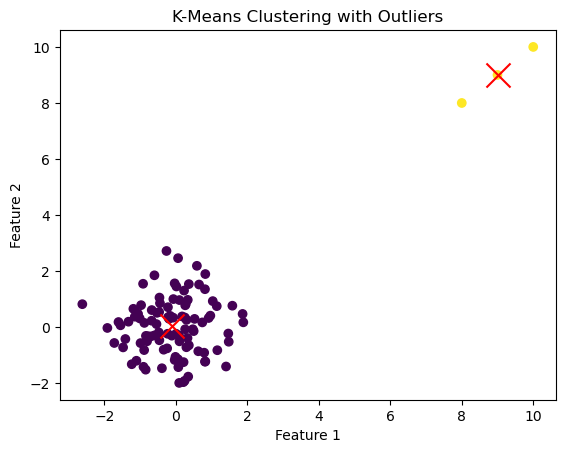

In [7]:
# Plot the results
plt.scatter(X_with_outliers[:, 0], X_with_outliers[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='x')
plt.title("K-Means Clustering with Outliers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [8]:
#Question:2
#Explore the Effect of Scaling on K-Means Clustering
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [9]:
# Generate a dataset with features on different scales
np.random.seed(42)
X = np.array([[1, 20], [2, 21], [3, 22], [10, 1], [11, 2], [12, 3]])
#Apply K-Means without scaling & Plot without scaling
#Apply K-Means with scaling & Plot scaling


In [10]:
# Apply K-Means without scaling
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

C:\Users\mdjro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

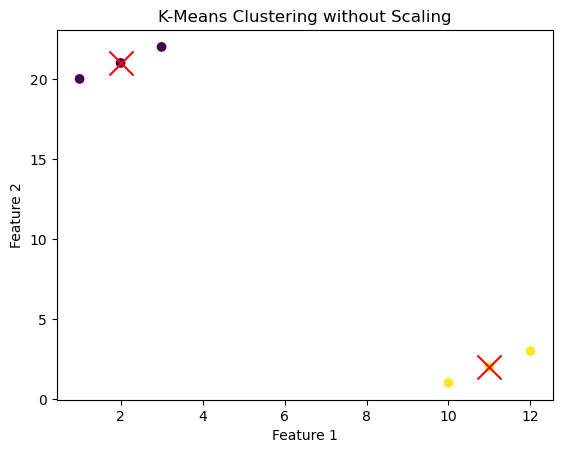

In [11]:
# Plot without scaling
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='x')
plt.title("K-Means Clustering without Scaling")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [12]:
# Apply K-Means with scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans_scaled = KMeans(n_clusters=2, random_state=42)
kmeans_scaled.fit(X_scaled)


C:\Users\mdjro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

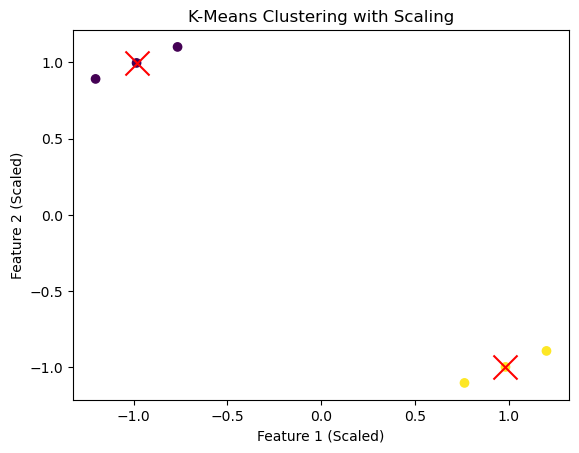

In [13]:
# Plot with scaling
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_scaled.labels_, cmap='viridis')
plt.scatter(kmeans_scaled.cluster_centers_[:, 0], kmeans_scaled.cluster_centers_[:, 1], s=300, c='red', marker='x')
plt.title("K-Means Clustering with Scaling")
plt.xlabel("Feature 1 (Scaled)")
plt.ylabel("Feature 2 (Scaled)")
plt.show()

In [14]:
#Question:3
#Identify the Optimal Number of Clusters Using the Elbow Method
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


In [15]:
# Generate a dataset with 3 clusters
X, y = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=42)


In [16]:
#Question 3
#Use the Elbow Method to find the optimal number of clusters
#Answer
Sum_of_squared_distances = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    Sum_of_squared_distances.append(kmeans.inertia_)

C:\Users\mdjro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\mdjro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\mdjro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\mdjro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

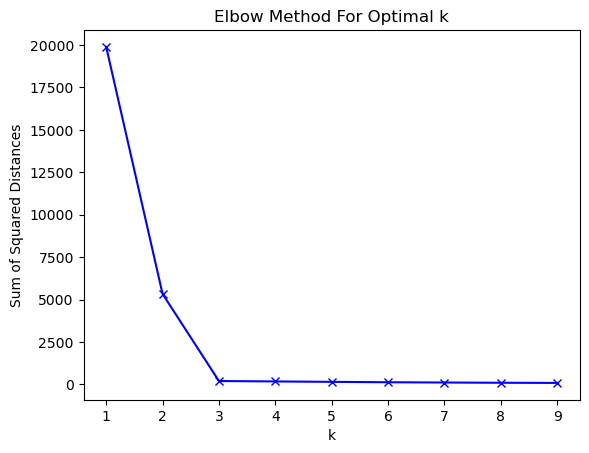

In [17]:
# Plot the Elbow Method result
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [18]:
#Question 4
#Compare the Effect of Initialization on K-Means Clustering
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


In [19]:
# Generate a dataset with 4 clusters
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

#Answer
# Apply K-Means with different initializations
kmeans_random = KMeans(n_clusters=4, init='random', n_init=1, random_state=42)
kmeans_random.fit(X)
kmeans_kmeanspp = KMeans(n_clusters=4, init='k-means++', n_init=1, random_state=42)
kmeans_kmeanspp.fit(X)

C:\Users\mdjro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\mdjro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=4, n_init=1, random_state=42)

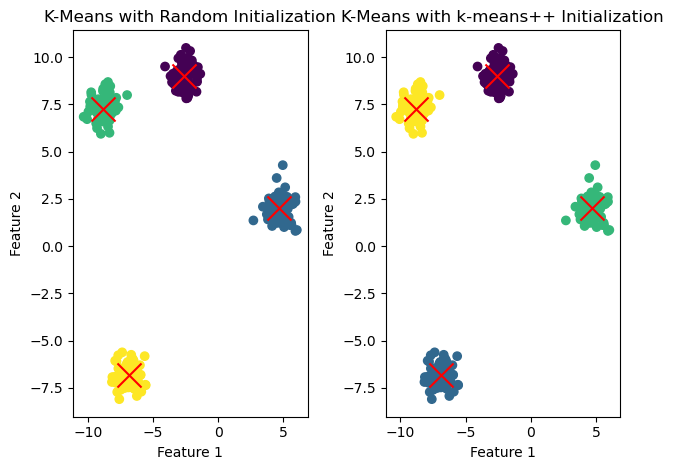

In [20]:
# Plot the results with random initialization
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_random.labels_, cmap='viridis')
plt.scatter(kmeans_random.cluster_centers_[:, 0], kmeans_random.cluster_centers_[:, 1], s=300, c='red', marker='x')
plt.title("K-Means with Random Initialization")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Plot the results with k-means++ initialization
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_kmeanspp.labels_, cmap='viridis')
plt.scatter(kmeans_kmeanspp.cluster_centers_[:, 0], kmeans_kmeanspp.cluster_centers_[:, 1], s=300, c='red', marker='x')
plt.title("K-Means with k-means++ Initialization")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.tight_layout()
plt.show()